In [11]:
"""
Created on 26.09.2023
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PARAMETERS
N = 100  # number of data points
maxdegree = 5  # max polynomial degree for plotting


def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2)**2) - 0.25 * ((9 * y - 2)**2))
    term2 = 0.75 * np.exp(-((9 * x + 1)**2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7)**2 / 4.0 - 0.25 * ((9 * y - 3)**2))
    term4 = -0.2 * np.exp(-(9 * x - 4)**2 - (9 * y - 7)**2)
    return term1 + term2 + term3 + term4


def create_X(x, y, n):
    """Returns the design matrix X from coordinates x and y with n polynomial degrees."""
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int(i * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x**(i - k)) * (y**k)

    return X


def MSE(y, y_tilde):
    """Returns the mean squared error of the two arrays."""
    return np.mean((y - y_tilde)**2)


def R2_score(y, y_tilde):
    """Returns the R2 score of the two arrays."""
    return 1 - np.sum((y - y_tilde)**2) / np.sum((y - np.mean(y))**2)


# Create data set
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

# Get franke function with noise
noise = np.random.normal(0, 0.1, x.shape)
z = FrankeFunction(x, y)  #+ noise

scaler = StandardScaler()

# Iterate through all the different polynomial degrees
train_mse = np.empty(maxdegree)
test_mse = np.empty_like(train_mse)
train_r2 = np.empty_like(train_mse)
test_r2 = np.empty_like(train_mse)
for degree in range(maxdegree):
    # Create design matrix X
    X = create_X(x, y, n=degree)
    
    # Split in training and test data up to the given degree
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    # Scale data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ordinary least squares linear regression
    beta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train
    z_tilde = X_train_scaled @ beta
    z_predict = X_test_scaled @ beta

    # Save the MSE and R2 values
    train_mse[degree] = MSE(z_train, z_tilde)
    test_mse[degree] = MSE(z_test, z_predict)
    train_r2[degree] = R2_score(z_train, z_tilde)
    test_r2[degree] = R2_score(z_test, z_predict)

Text(0, 0.5, 'Value')

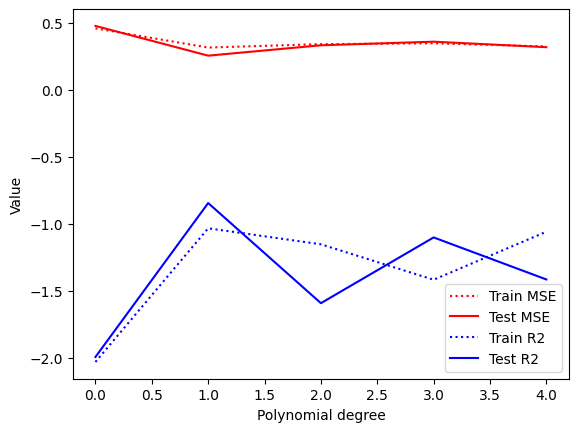

In [13]:
# Plot the MSE and R2 scores as function of poly. degree
degrees = np.asarray(range(maxdegree))
plt.plot(degrees, train_mse, "r:", label="Train MSE")
plt.plot(degrees, test_mse, "r-", label="Test MSE")
plt.plot(degrees, train_r2, "b:", label="Train R2")
plt.plot(degrees, test_r2, "b-", label="Test R2")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Value")  